In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary

Every year hundreds of MLB players become free agents when their previous contracts run out, and they have to seek new teams.  The contracts they sign can vary wildly based on the player's skill, age, position, and more.  We will attempt to uncover some insights about what influences the size and length of free agent contracts signed by MLB players.

The dataset we will use is scraped from ESPN.com, and contains salary information for all free agent contracts from 2006-2019.  To see more about the web scraping process we used, explore the 'ESPN Web Scraper' notebook.

In [43]:
# read json into a pandas dataframe
players = pd.read_json('players.json')

# re-order columns
players = players[['year','name','pos','age','status','prev_team','new_team','dollars','years_signed']]

In [44]:
players.head()

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed
0,2006,Moises Alou,LF,39,Signed (A),Giants,Mets,"$8,500,000",1
1,2006,Tony Armas,SP,28,Signed,Nationals,Pirates,"$3,500,000",1
2,2006,Rich Aurilia,1B,34,Signed (A),Reds,Giants,"$8,000,000",2
3,2006,Danys Baez,RP,28,Signed (A),Braves,Orioles,"$19,000,000",3
4,2006,Paul Bako,C,33,Signed,Royals,Orioles,"$900,000",1


# Analysis by Year

First we clean the 'dollars' column by removing non-digit characters and casting from string to int.

In [45]:
if players['dollars'].dtype == 'object':
    players['dollars'] = players['dollars'].str.replace('$','').str.replace(',','').astype(int)

We can generate a scatter plot which shows the size of each contract signed alongside the year.  The points for Alex Rodriguez and Bryce Harper's record-setting contracts are labeled.

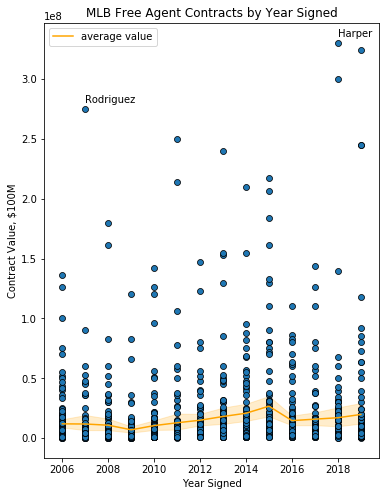

In [46]:
fig, ax = plt.subplots(figsize=(6,8))

# Scatter plot
sns.lineplot(x='year',y='dollars', data=players, color='orange', label='average value', ax=ax)
sns.scatterplot(x='year',y='dollars', data=players, edgecolor='black', ax=ax)

plt.legend(loc='upper left')
ax.set_title('MLB Free Agent Contracts by Year Signed')
ax.set_ylabel('Contract Value, $100M')
ax.set_xlabel('Year Signed')
ax.text(2007,280000000,'Rodriguez')
ax.text(2018,335000000,'Harper')

plt.savefig('figures/contracts_by_year.png', bbox_inches='tight')
plt.show()

# Analysis by Age

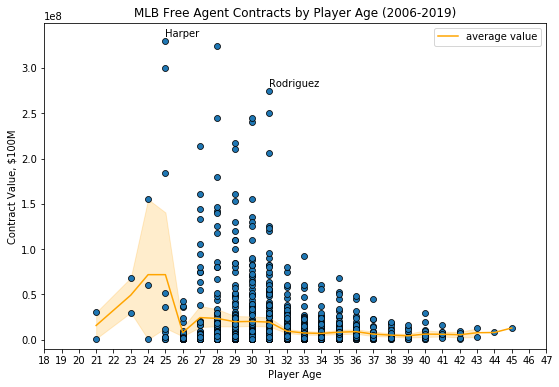

In [47]:
fig, ax = plt.subplots(figsize=(9,6))

x_ticks = np.arange(30) + 18
y_ticks = 50000000 * np.arange(7)

# Scatter plot
ax = sns.lineplot(x='age', y='dollars', data=players, color='orange', label='average value')
sns.scatterplot(x='age', y='dollars', data=players, edgecolor='black')

ax.legend(loc='best')
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_ylim([-10000000,350000000])
ax.set_title('MLB Free Agent Contracts by Player Age (2006-2019)')
ax.set_ylabel('Contract Value, $100M')
ax.set_xlabel('Player Age')
ax.text(31,280000000,'Rodriguez')
ax.text(25,335000000,'Harper')

plt.savefig('figures/contracts_by_age.png', bbox_inches='tight')
plt.show()

Looking at the age-distributed data, we see that very few players sign free agent contracts before age 27.  However, those that do tend to have higher average contract values than any other age group.  This makes some sense, as players do not usually sign free agent deals until they have accrued six years of MLB service time.  This means either the player joined the league very early (such as with Harper, who made his debut at 19), or they were signed from another international league, such as Japan or Cuba.  Players who fulfill either of these criteria are likely to be quite talented, and thus more valuable.

The age 26 season is a curious point, since it is noticeably lower than both 25 and 27, and there were no contracts given to 26-year olds for values greater than $50M.  While this could be a statistical anomaly, it could be the case that most players enter free agency for the first time around age 27-28, after starting their career ate 21-22 and accruing their size years of service time, while most international signees would have made their transition to the MLB earlier than age 26.

We also see that player value tends to drop off between the age 31 and 32 seasons.  Ages 25-30 is widely considered to be a player's "prime" in baseball, so this drop-off makes sense.

In [48]:
players[players['age'] < 26]

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed
53,2006,Yoslan Herrera,SP,25,Signed,--,Pirates,1920000,3
72,2006,Daisuke Matsuzaka,RP,25,Signed,Japan,Red Sox,52000000,6
127,2006,Jerome Williams,RP,24,Signed,Athletics,Nationals,500000,1
352,2009,Matt Capps,RP,25,Signed,Pirates,Nationals,3500000,1
356,2009,Aroldis Chapman,RP,21,Signed,Cuba,Reds,30250000,6
422,2009,Scott Olsen,SP,25,Signed,Nationals,Nationals,1000000,1
469,2010,Melky Cabrera,RF,25,Signed,Braves,Royals,1250000,1
534,2010,Tsuyoshi Nishioka,2B,25,Signed,Japan,Twins,9000000,3
597,2011,Wei-Yin Chen,RP,25,Signed,Japan,Orioles,11338000,3
603,2011,Yu Darvish,SP,24,Signed,Japan,Rangers,60000000,6


During this analysis we run across an error in the ESPN data in line 1109.  It seems that there are two Thomas Milones in the MLB, and the listing here confuses the two.  "Tommy" Milone (30 yr old starting pitcher) was the one who signed the contract listed here with the Brewers, while Thomas Milone (21 yr old right fielder) did not.  We will correct this row in the data to reflect the proper age and position of the signee.

In [49]:
players.iloc[1109, 2] = 'SP'
players.iloc[1109, 3] = 30
print(players.iloc[1109])

year                     2016
name            Thomas Milone
pos                        SP
age                        30
status                 Signed
prev_team               Twins
new_team              Brewers
dollars               1250000
years_signed                1
Name: 1109, dtype: object


# Analysis by Position

We have some minimal cleaning to do on the 'pos' column.  Namely, there are 3 rows where the position is set to 'P', and 5 where the position is set to 'OF'.  We want these to be set to more specific values, such as 'SP' or 'LF', so we will manually fix these.

In [50]:
# correct pitcher positions
players.loc[players['name']=='Adam Eaton', 'pos'] = 'SP'
players.loc[players['name']=='Andrew Bailey', 'pos'] = 'RP'
players.loc[players['name']=='Eddie Guardado', 'pos'] = 'RP'

# correct outfield positions
players.loc[players['name']=='Jose Cruz Jr.', 'pos'] = 'LF'
players.loc[players['name']=='So Taguchi', 'pos'] = 'LF'
players.loc[players['name']=='Fred Lewis', 'pos'] = 'LF'
players.loc[players['name']=='Carlos Beltran', 'pos'] = 'CF'

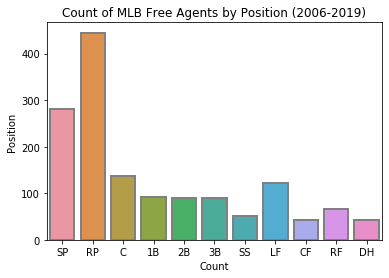

In [51]:
position_order = ['SP','RP','C','1B','2B','3B','SS','LF','CF','RF','DH']

sns.countplot(x='pos', order=position_order, linewidth=2, edgecolor='grey', data=players)
plt.title('Count of MLB Free Agents by Position (2006-2019)')
plt.ylabel('Position')
plt.xlabel('Count')

plt.show()

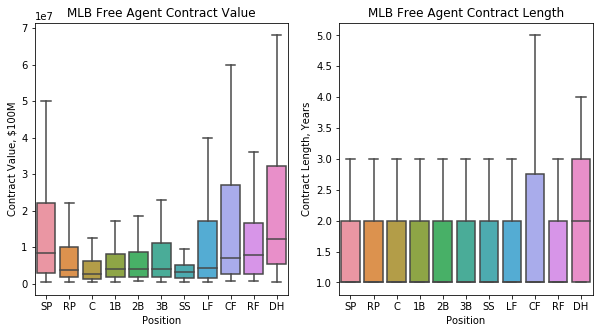

In [52]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(x='pos', y='dollars', data=players, order=position_order, ax=ax1, sym='')
ax1.set_title('MLB Free Agent Contract Value')
ax1.set_ylabel('Contract Value, $100M')
ax1.set_xlabel('Position')

sns.boxplot(x='pos', y='years_signed', data=players, order=position_order, sym='', ax=ax2)
ax2.set_title('MLB Free Agent Contract Length')
ax2.set_ylabel('Contract Length, Years')
ax2.set_xlabel('Position')

plt.show()

Curiously, the lowest-paying position seems to be Shortstop.  This is a bit unexpected because the previous chart reflected that shortstops were the least-signed position in free agency, potentially meaning they would demand a premium price.  A possible cause here is that shortstop is often the most athletic and physically demanding infield position, meaning teams might prefer to develop or trade for younger players than what is available in free agency.  A possible bias is that the ESPN data might mislabel some shortstops as Third Basemen or other positions, because many infielders can play in more than one spot, and it is difficult to reflect this with a single value for position.